['POC8.txt']


100%|██████████| 1/1 [00:00<00:00, 46.25it/s]
c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:402: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'POC8.txt' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  record.loc[file,'filename']=file
c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:403: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  record.loc[file,'rays_present']=not all_rayswave.empty


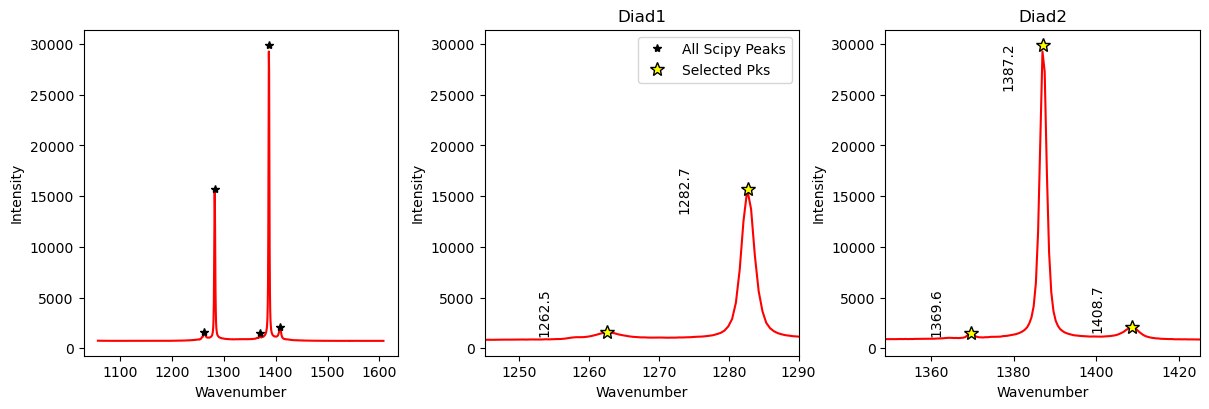

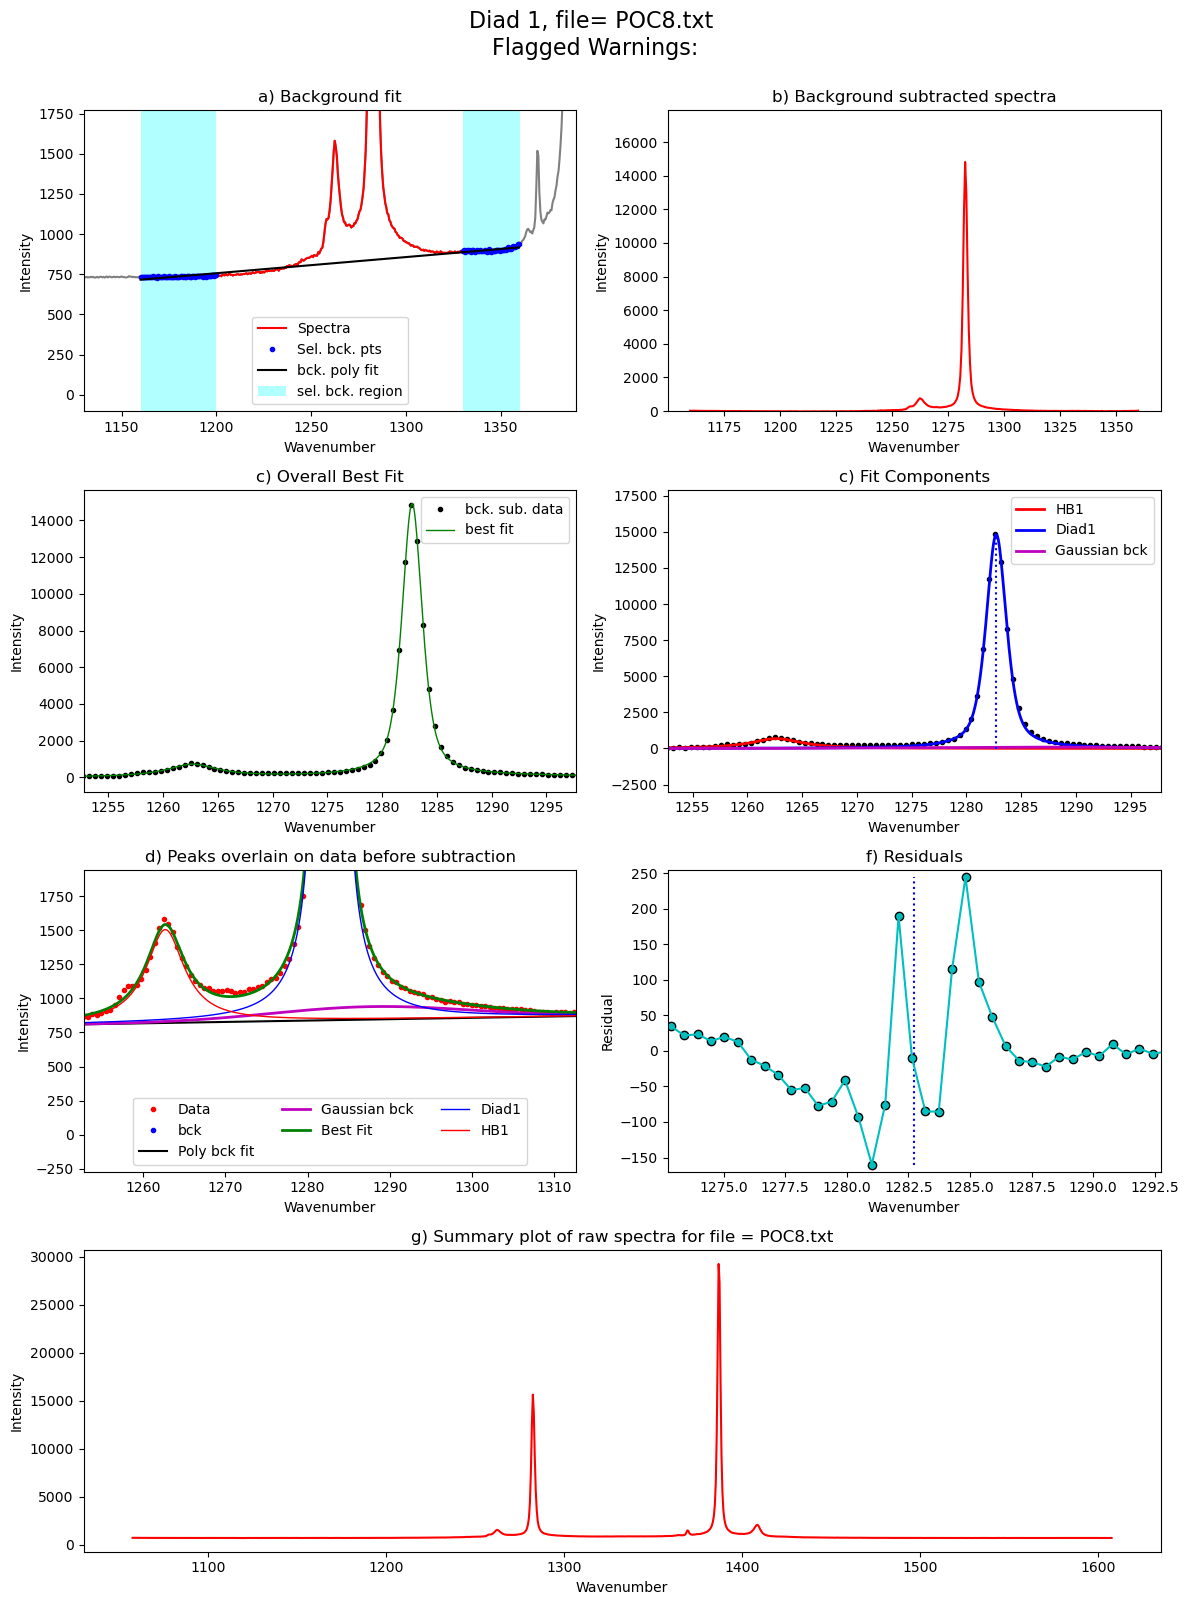

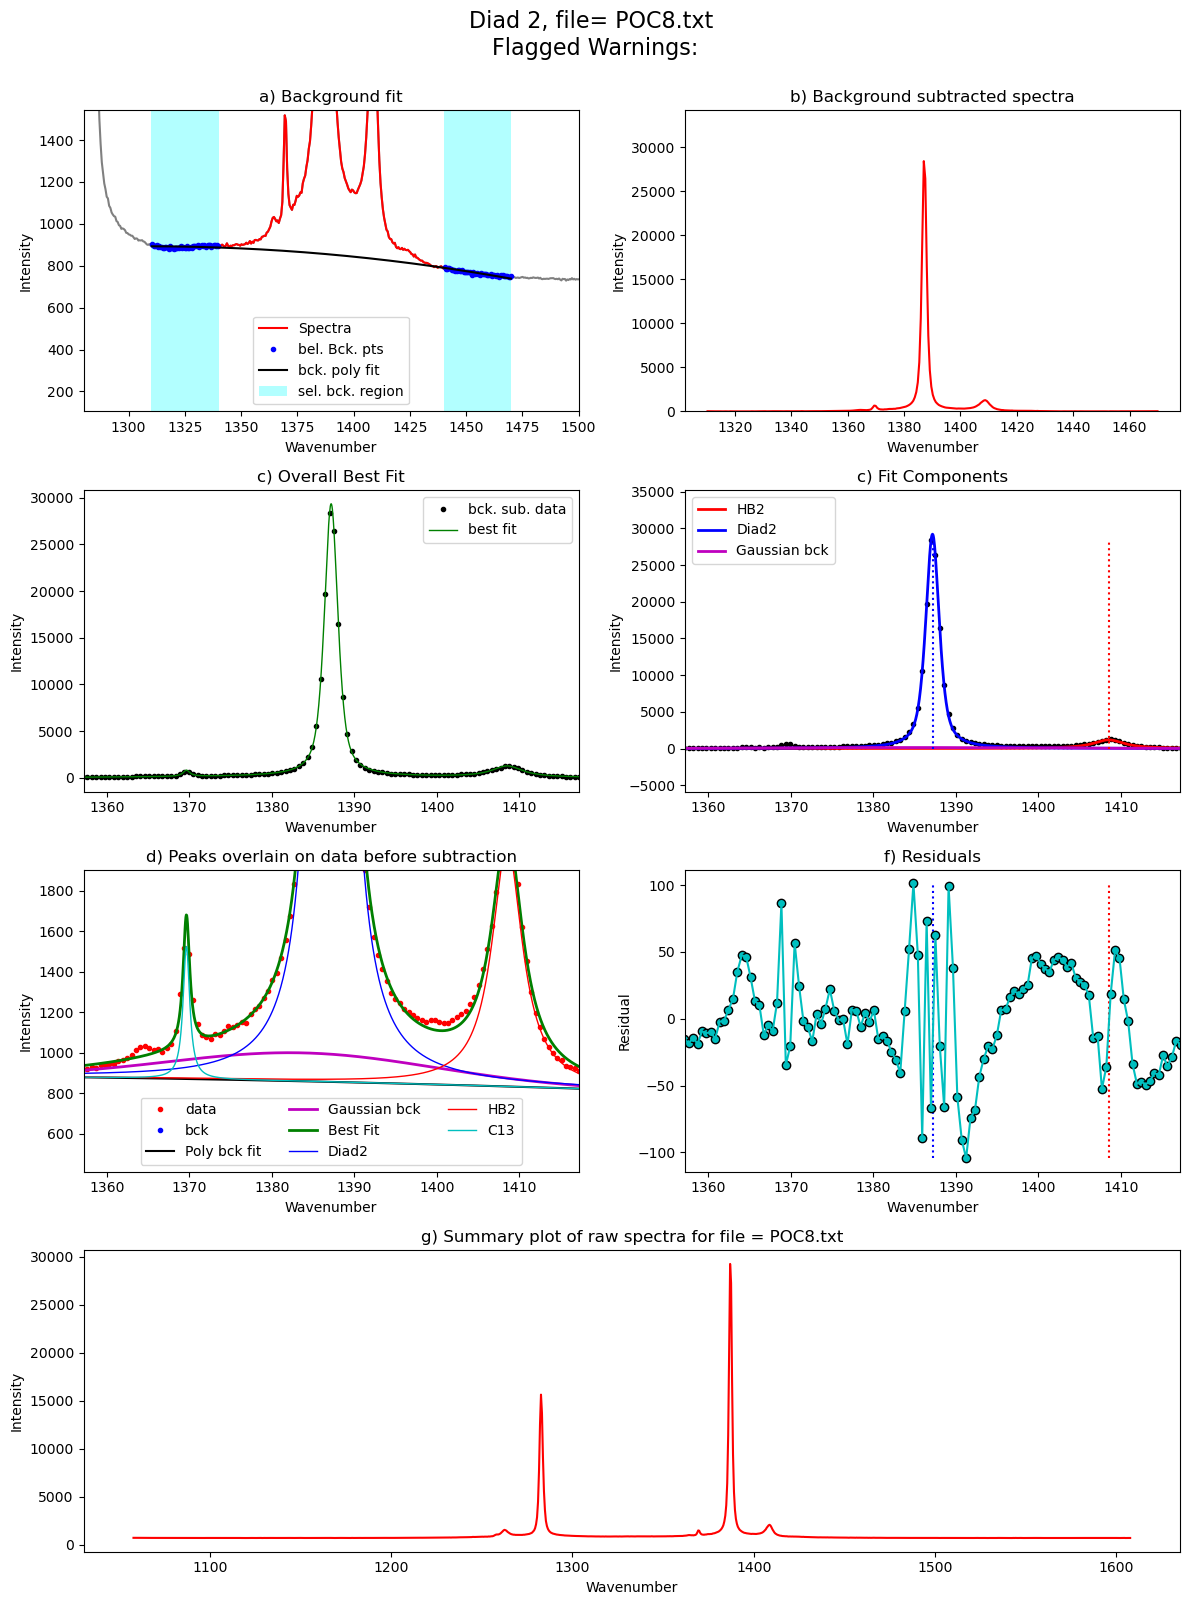

In [33]:
import unittest
import pandas as pd
import DiadFit as pf
import os

decimalPlace=4
# define things
file_ext='.txt'
prefix=True
spectra_path = r'C:\Users\penny\Box\Berkeley_new\DiadFit_outer\Unit_tests'
exclude_str=['Ne', 'K23']
filetype='headless_txt'
i=0

# Get files
Diad_Files=pf.get_files(path=spectra_path, file_ext=file_ext, exclude_str=exclude_str)
print(Diad_Files)
# series
filename='POC8.txt'

# Set up scipy find peaks

diad_id_config=pf.diad_id_config(prominence=30, width=1)

# now see what peaks it found

df_peaks, Diad, fig=pf.identify_diad_peaks(
config=diad_id_config,
path=spectra_path, filename=Diad_Files[0],
filetype=filetype, plot_figure=True)
df_peaks

# Get approx fit params

fit_params, data_y_all=pf.loop_approx_diad_fits(spectra_path=spectra_path, config=diad_id_config,
                       Diad_Files=Diad_Files, filetype=filetype, plot_figure=False)

Diad_files=fit_params['filename']

# cosmic ray filter

# This extract the peaks for the diads, HBs and C13 from fit_params_crr, essential to the CRR process.
diad_peaks=fit_params[['Diad1_pos','Diad2_pos','HB1_pos','HB2_pos','C13_pos']]

#Pick your settings
plot_rays='rays_only'#whether to plot the results or not
export_cleanspec=True #whether to export the spectra with the cosmic ray pixels removed
save_fig='all' #whether to save the figures, options are 'all' or the default 'rays_only'
dynfact=0.001 #dynamic intensity factor for the first pass (y axis on the leftmost plots)
dynfact_2=0.001#dynamic intensity factor for the second pass
n=1 # number of neighboring pixels being compared, typically 1 is ideal.

exclude_ranges=[(1100,1200)] # List of tuples containing ranges to exclude from filtering (i.e., for secondary peaks


rays_found,spectrum=pf.cosmicray_filter.filter_singleray(path=spectra_path,
                                        exclude_ranges=exclude_ranges,filetype=filetype,
                                        Diad_files=Diad_files,i=i,diad_peaks=diad_peaks,plot_rays=plot_rays,
                                      export_cleanspec=export_cleanspec,save_fig=save_fig,dynfact=dynfact,dynfact_2=dynfact_2,n=n)



GroupN_df=fit_params
# Set up actual peak fit

model_name='PseudoVoigtModel'

# Lets use a strong fit to start with
diad1_fit_config_strong=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1160, 1200),
    upper_bck_diad1=(1330, 1360),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30,
     y_range_baseline=1000,
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i],
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])

Diad1_fit_strong=pf.fit_diad_1_w_bck(config1=diad1_fit_config_strong,
config2=diad_id_config,
path=spectra_path, filename=filename,
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])


diad2_fit_config_strong=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])

Diad2_fit_strong=pf.fit_diad_2_w_bck(config1=diad2_fit_config_strong,
    config2=diad_id_config,
path=spectra_path, filename=filename, filetype=filetype,
plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i],
C13_pos=GroupN_df['C13_pos'].iloc[i])


In [34]:
fit_params

,filename,approx_split,Diad1_pos,Diad2_pos,HB1_pos,HB2_pos,C13_pos,Diad1_abs_prom,Diad2_abs_prom,HB1_abs_prom,...,HB2_height,C13_height,Diad1_height,HB1_height,Diad1_Median_Bck,Diad2_Median_Bck,C13_HB2_abs_prom_ratio,Diad2_HB2_Valley_prom,HB1_prom/std_betweendiads,HB2_prom/std_betweendiads
0,POC8.txt,104.458073,1282.700881,1387.158953,1262.52523,1408.714841,1369.600803,14877.827148,29124.652659,839.030003,...,2102.686746,1543.561916,15696.827148,1580.829991,819.0,826.150009,2.787896,1.372277,225.094842,361.262086


In [35]:
Diad1_fit_strong['Diad1_Combofit_Cent'].iloc[0]

1282.7310347177588

In [28]:
Diad1_fit_strong['Diad1_Voigt_Area'].iloc[0]

44960.41832038153

In [29]:
Diad1_fit_strong['Diad1_cent_err'].iloc[0]

0.0015903706254091026

In [30]:
Diad1_fit_weak.columns

NameError: name 'Diad1_fit_weak' is not defined

In [ ]:
GroupN_df

,filename,approx_split,Diad1_pos,Diad2_pos,HB1_pos,HB2_pos,C13_pos,Diad1_abs_prom,Diad2_abs_prom,HB1_abs_prom,...,HB2_height,C13_height,Diad1_height,HB1_height,Diad1_Median_Bck,Diad2_Median_Bck,C13_HB2_abs_prom_ratio,Diad2_HB2_Valley_prom,HB1_prom/std_betweendiads,HB2_prom/std_betweendiads
0,23 K23_101_FID_50X.txt,103.288297,1285.793802,1389.082099,1265.511217,1410.470107,NaN,648.709479,1091.010726,99.795374,...,1389.047425,NaN,1892.584479,1309.045374,1243.875,1299.25,NaN,0.980548,11.744985,8.126238


In [36]:
Diad2_fit_strong['Diad2_Combofit_Cent'].iloc[0]

1387.1727902209943

In [ ]:
Diad2_fit_strong['Diad2_Voigt_Area'].iloc[0]

1340.5602764421023

In [37]:
Diad2_fit_strong['Diad2_cent_err'].iloc[0]

0.0006681704840915489

## Lets test with a Gaussian peak

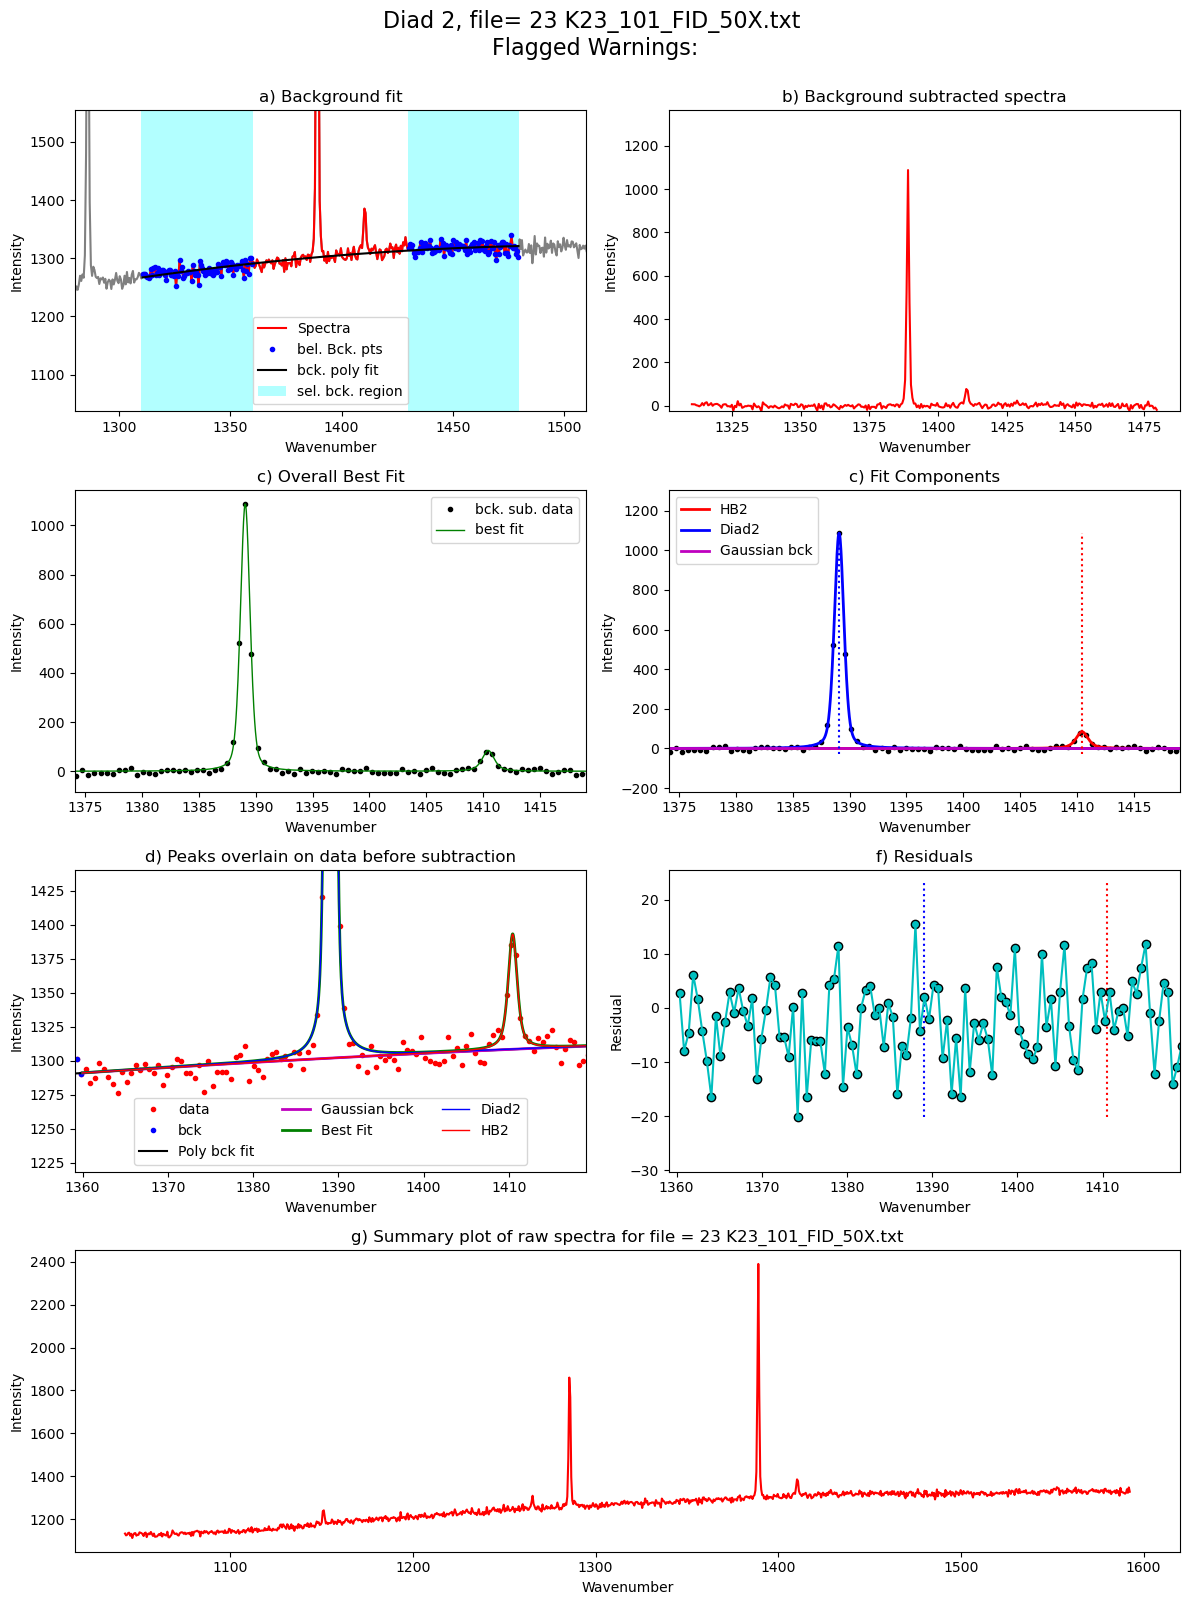

In [ ]:
diad2_fit_config_strong=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
 fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,
    x_range_residual=30, y_range_baseline=100,
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i],
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])

Diad2_fit_strong=pf.fit_diad_2_w_bck(config1=diad2_fit_config_strong,
    config2=diad_id_config,
path=spectra_path, filename='23 K23_101_FID_50X.txt', filetype=filetype,
plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i],
C13_pos=GroupN_df['C13_pos'].iloc[i])